# Loan Application Status Prediction:
# Problem Statement:
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

# Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

# Dependent Variable (Target Variable):

- Loan_Status

You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

In [1]:
# Importing Necessory Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from scipy.stats import zscore
from sklearn.preprocessing import OrdinalEncoder

# Models:
from sklearn.model_selection import train_test_split,GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Matrics for evaluation:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_roc_curve,roc_auc_score

In [2]:
#READ THE DATASET

df=pd.read_csv('C:/Users/HP/Desktop/data sets/loan_prediction.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


- Loans is an important sector of business for the banks,hence this dataset belongs the details of the applicants or customers applying for getting loan.Here the targeted variavle is the "Loan_Status" column which belongs Y=Yes and N = No,thus this is a classification problem where we have to predict wheather a loan will be approved or not..The company wants to automate the loan eligibilitty process based on customer details while filling the online application form.These details are Loan Id ,gender,Married,Dependents,education,Self-Employed,Property Area and Loan status are object in nature,Applicant income is integer in nature and CoapplicantIncome,LoanAmount,Loan_Amount_Term and Credit_History are float in nature.
# Dataset description:
Variables:-
- Loan_ID	-Unique Loan ID
- Gender	-Male/ Female
- Married	-Applicant married (Y/N)
- Dependents	-Number of dependents
- Education	-Applicant Education (Graduate/ Under Graduate)
- Self_Employed	-Self employed (Y/N)
- ApplicantIncome	-Applicant income
- CoapplicantIncome-	Coapplicant income
- LoanAmount	-Loan amount in thousands
- Loan_Amount_Term	-Term of loan in months
- Credit_History	-credit history meets guidelines
- Property_Area	-Urban/ Semi Urban/ Rural
- Loan_Status	-Loan approved (Y/N)

In [3]:
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

- we can see that Loan id is having most unique set of datas,then ApplicantIncome ,Coapplicant Income, and Loan Amount.

In [4]:
df.shape

(614, 13)

- There are 614 rows and 13 columns in this dataset.

In [5]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

- Found out all the column names in the dataset.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


- We can see that,Loan Id ,gender,Married,Dependents,education,Self-Employed,Property Area and Loan status are object in nature.
- Applicant income is integer in nature and CoapplicantIncome,LoanAmount,Loan_Amount_Term and Credit_History are float in nature.

In [7]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

- We can see that,Loan Id ,gender,Married,Dependents,education,Self-Employed,Property Area and Loan status are object in nature.
- Applicant income is integer in nature and CoapplicantIncome,LoanAmount,Loan_Amount_Term and Credit_History are float in nature.

In [8]:
# Statistical summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


- We can see in count that all the values are not same thus,the data set is having missing values.
- ApplicantIncome is having min values of 150 and maximum values of 81000.
- CoapplicantIncome is having  minimum values of 0.0 and maximum values of 41667.
- Loan Amount is havinig minimum values of 9.0 and maximum values of 700.0
- Loan amount term is havng minimum values of 12.0 months and maximum values of 480 months.
- credit history is havng max values of 1.0 and mininmum of 0.0.
- There is skewnes in the dataset because the differnce between the standard deviation and mean is very high,we will remove the skewness latter.

In [9]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

- There is null values in different columns like Gender,Married,Dependents,Self_Employed,LoanAmount,Loan_Amount_Term and Credit History.

In [10]:
# filling the missing values of the numerical columns:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())

- Filling the missing values in numerical columns by using mean method.

In [11]:
#filling the missing values of the categorical columns:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

- Filling the missing values in categorical columns by using mode method.

In [12]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

- All the null values are filled and all the columns are showing 0 missing values.

# EDA:

# BI VARIATE ANALYSIS:

In [13]:
#Counting Gender Column
df['Gender'].value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

- There are more Male than female applicant.

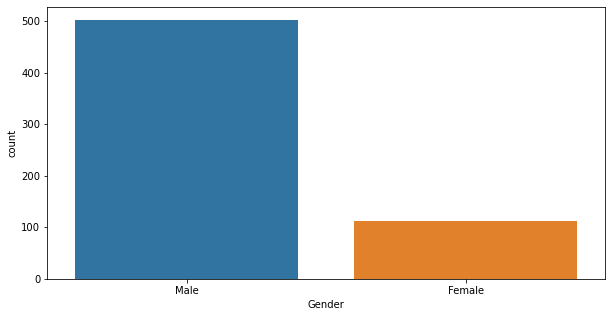

In [14]:
# Plotting Gender Column:
plt.figure(figsize=(10,5))
sns.countplot('Gender',data=df)
plt.show()


- There are more Male than female applicant.

In [15]:
#COunting Married Column:
df['Married'].value_counts()

Yes    401
No     213
Name: Married, dtype: int64

- Martial Status: 2/3rd of the population in the dataset is Marred; Married applicants are more likely to be granted loans.

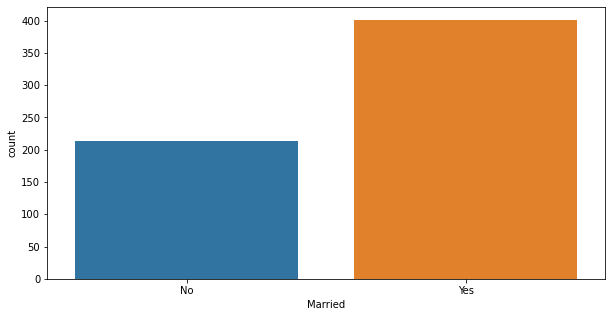

In [16]:
#Plotting Married Column:
plt.figure(figsize=(10,5))
sns.countplot('Married',data=df)
plt.show()

- Martial Status: 2/3rd of the population in the dataset is Marred; Married applicants are more likely to be granted loans.

In [17]:
#Counting Dependents Column:
df['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

-  Majority of the population have zero dependents and are also likely to accepted for loan.

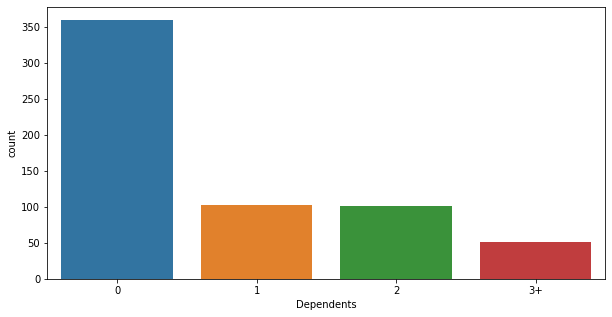

In [18]:
#Plotting Dependent Column:
plt.figure(figsize=(10,5))
sns.countplot('Dependents',data=df)
plt.show()

- Majority of the population have zero dependents and are also likely to accepted for loan.

In [19]:
#Counting the Education column:
df['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

- About 5/6th of the population is Graduate and graduates have higher propotion of loan approval.

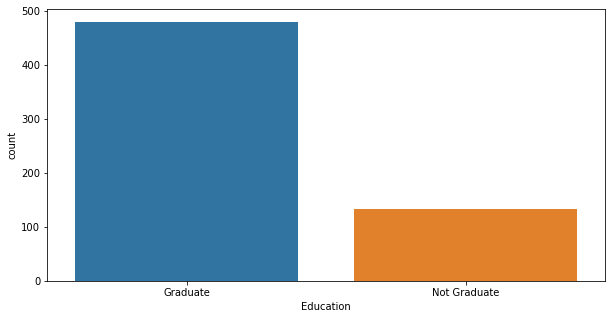

In [20]:
#Plotting the Education Column:
plt.figure(figsize=(10,5))
sns.countplot('Education',data=df)
plt.show()

- About 5/6th of the population is Graduate and graduates have higher propotion of loan approval.

In [21]:
#Plotting Self Employed:
df['Self_Employed'].value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

- 5/6th of population is not self employed.so loan approval may be  in stake.

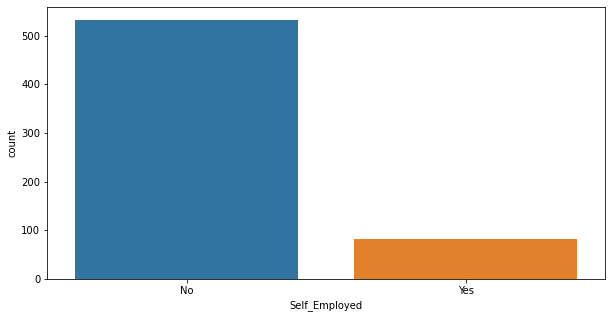

In [22]:
#Plotting Self Employed column:
plt.figure(figsize=(10,5))
sns.countplot('Self_Employed',data=df)
plt.show()

- 5/6th of population is not self employed.so loan approval may be  in stake.

In [23]:
# Counting Property Area
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

- More applicants from Semi-urban and also likely to be granted loans.

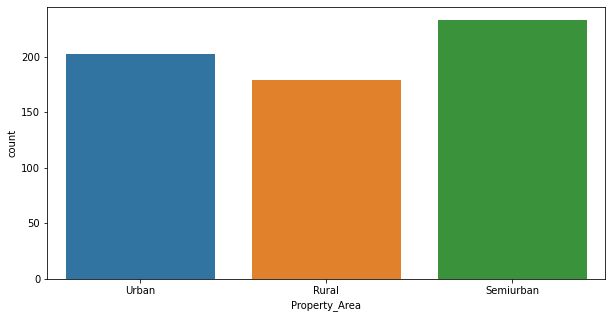

In [24]:
# Counting Property Area
plt.figure(figsize=(10,5))
sns.countplot('Property_Area',data=df)
plt.show()

- More applicants from Semi-urban and also likely to be granted loans.

In [25]:
# Counting Loan Status column:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

- About 2/3rd of applicants have been granted loan.

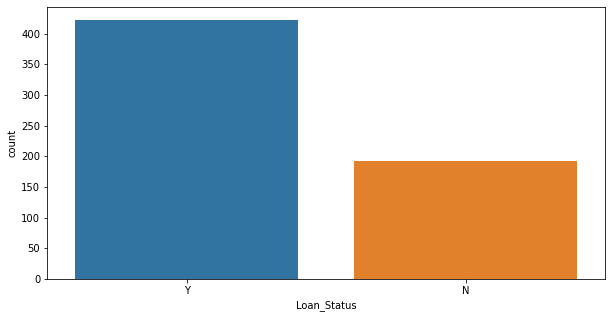

In [26]:
# Plotting Loan Status column:
plt.figure(figsize=(10,5))
sns.countplot('Loan_Status',data=df)
plt.show()

- About 2/3rd of applicants have been granted loan.

Minimum 150
Maximum 81000


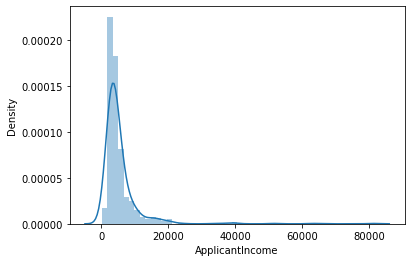

In [27]:
#Plotting Applicant Income
sns.distplot(df['ApplicantIncome'])
print('Minimum',df['ApplicantIncome'].min())
print('Maximum',df['ApplicantIncome'].max())

- Applicant income is not in shape of normaly distributed.It is highly Right Skewed.
- ApplicantIncome is having min values of 150 and maximum values of 81000.


Minimum 0.0
Maximum 41667.0


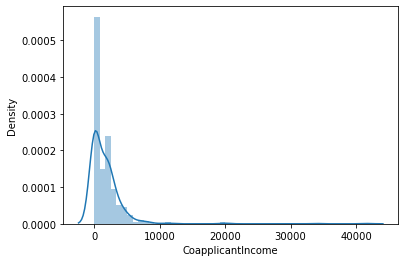

In [28]:
# Plotting CoapplicantIncome column:
sns.distplot(df['CoapplicantIncome'])
print('Minimum',df['CoapplicantIncome'].min())
print('Maximum',df['CoapplicantIncome'].max())

- CoapplicantIncome is not in shape of normaly distributed.It is highly Right Skewed.
- CoapplicantIncomee is having min values of 0.0 and maximum values of 41667.

Minimum 9.0
Maximum 700.0


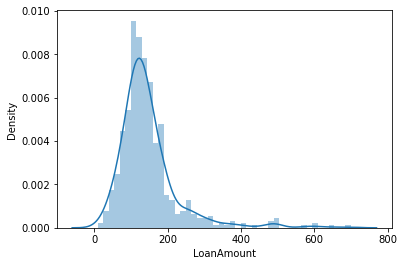

In [29]:
# Plotting Loan Amount Column:

sns.distplot(df['LoanAmount'])
print('Minimum',df['LoanAmount'].min())
print('Maximum',df['LoanAmount'].max())

- LoanAmountis not in shape of normaly distributed.It is highly Right Skewed.
- LoanAmount is having min values of 9.0 and maximum values of 700.

Minimum 12.0
Maximum 480.0


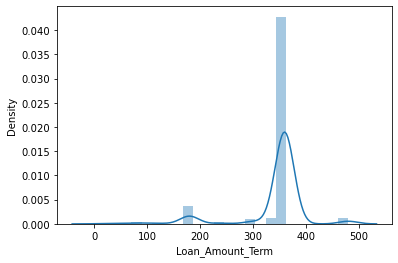

In [30]:
#Plotting Loan_Amount_Term column:
sns.distplot(df['Loan_Amount_Term'])
print('Minimum',df['Loan_Amount_Term'].min())
print('Maximum',df['Loan_Amount_Term'].max())

- LoanAmount Termis not in shape of normaly distributed.It is highly Left Skewed.
- LoanAmount Term is having min values of 12.0 and maximum values of 480.

Minimum 0.0
Maximum 1.0


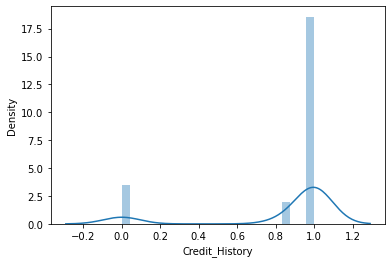

In [31]:
# Plotting Credit History Column:
sns.distplot(df['Credit_History'])
print('Minimum',df['Credit_History'].min())
print('Maximum',df['Credit_History'].max())

- Credit_History Termis not in shape of normaly distributed.It is highly Left Skewed.
- Credit_History Term is having min values of 0 and maximum values of 1.0.

# UNIVARIATE ANALYSIS:

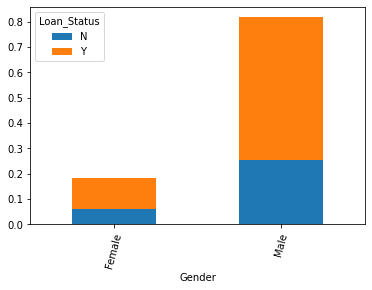

In [32]:
#Plotting Gender vs Loan Status:
ct = pd.crosstab(df.Gender, df.Loan_Status,normalize=True)
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

- Male applicant has more chance of getting the loan approval.

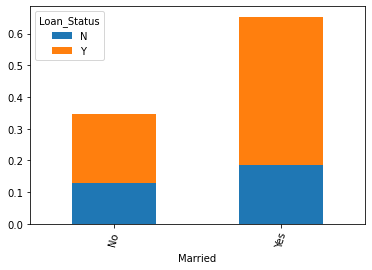

In [33]:
# Plotting married vs Loan Status:
ct = pd.crosstab(df.Married, df.Loan_Status,normalize=True)
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

- Being married increases your chances of loan approval.

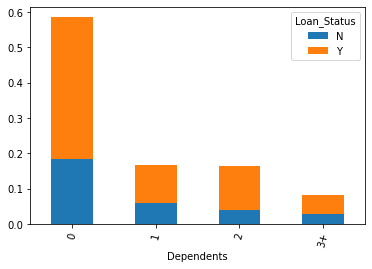

In [966]:
# Plotting Dependents vs Loan Status:
ct = pd.crosstab(df.Dependents, df.Loan_Status,normalize=True)
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

- No of dependents increases your chances of loan approval.

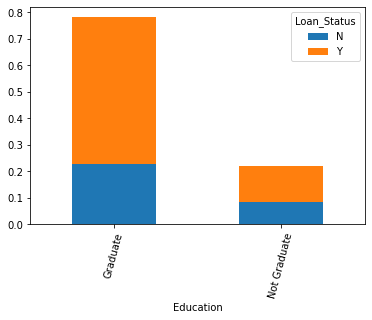

In [35]:
#Education vs Loan_Status:
ct = pd.crosstab(df.Education, df.Loan_Status,normalize=True)
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

- Being Graduate incrases the chances of loan approval.

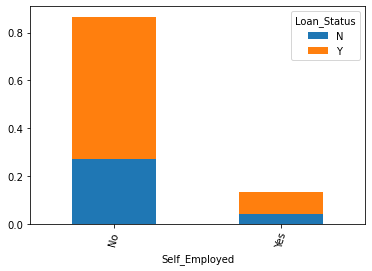

In [37]:
#Plotting Self employed vs Loan Status:
ct = pd.crosstab(df.Self_Employed, df.Loan_Status,normalize=True)
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()


- There is no impact on the loan status if you are self employed or not.

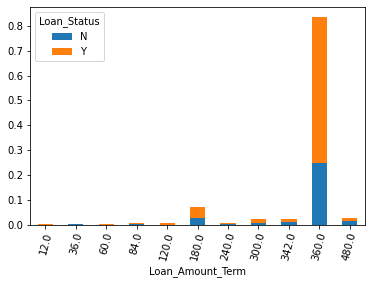

In [969]:
#Plotting Loan Amount term vs Loan_Status:
ct = pd.crosstab(df.Loan_Amount_Term, df.Loan_Status,normalize=True)
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

- Most of the applicant prefer to have 360 Term plan for loan.

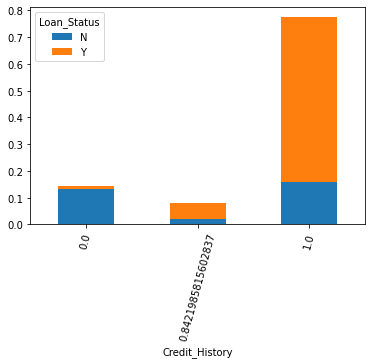

In [38]:
#Plotting Credit history vs Loan Status:
ct = pd.crosstab(df.Credit_History, df.Loan_Status,normalize=True)
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

- Most of the Loan Status belongs to the credit history score 1.0.

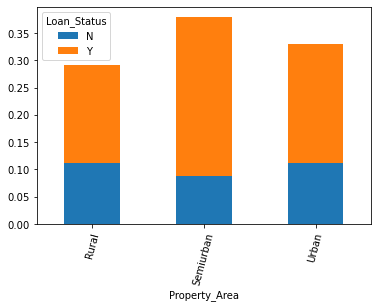

In [39]:
#Plotting Property area vs Loan Status:
ct = pd.crosstab(df.Property_Area, df.Loan_Status,normalize=True)
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

- The applicants living in semi urban area have the greater chances for approval of loan.

<AxesSubplot:xlabel='Education', ylabel='ApplicantIncome'>

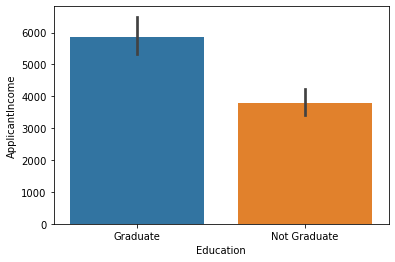

In [40]:
#Plotting Education vs Applicant Income:
sns.barplot("Education","ApplicantIncome",data=df)

- The graduate applicants have higher income than the Non Graduate applicants.

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Property_Area'>

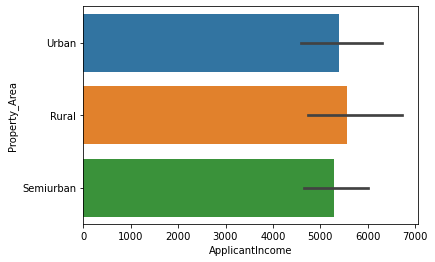

In [41]:
#Plotting Applicant income vs Property Area:
sns.barplot(y="Property_Area",x="ApplicantIncome",data=df)

- The applicants living in Rural areas is having higher income than the urban and semi urban  areas.

<AxesSubplot:xlabel='Education', ylabel='LoanAmount'>

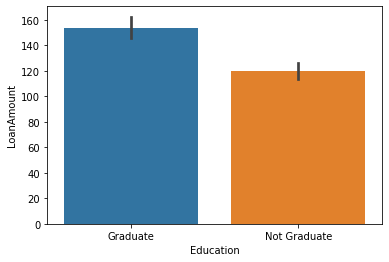

In [42]:
#Plotting Loan Amount vs Education
sns.barplot("Education","LoanAmount",data=df)

- The loan amount applied by the graduate applicants is higher than the non graduate applicants.

<AxesSubplot:xlabel='Gender', ylabel='LoanAmount'>

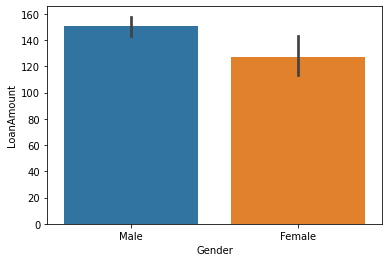

In [43]:
# Plotting Gender vs Loan Amounnt:
sns.barplot("Gender","LoanAmount",data=df)

- The male applicants applied higher loan amount than the female applicants.

<AxesSubplot:xlabel='Married', ylabel='LoanAmount'>

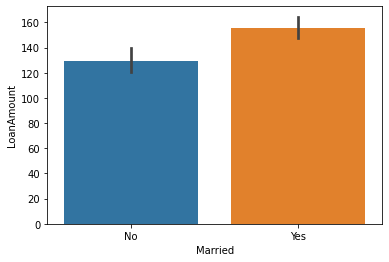

In [44]:
#Plotting Married vs Loan Amount:
sns.barplot("Married","LoanAmount",data=df)

- The married applicats require higher loan amount than the non-married applicants.

In [45]:
#Total income:
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0


- Creating another column named Total income to add the Applicant income column and Coapplicantincome column.

# MULTUVARIATE ANALYSIS:

<AxesSubplot:>

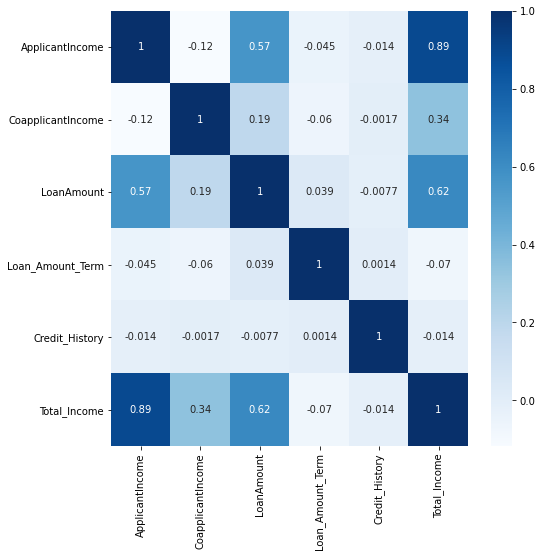

In [46]:
#checking Multi-collinearity of the variables by heat map:
corr=df.corr()
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True,cmap='Blues')

- Credit history has a very high corelation for loan being approved or rejected.
- Loan Status has no corelation with being Self employed.
- Loan amount is corelated with Applicant Income.

# CHECHING NORMAL DISTRIBUTION:

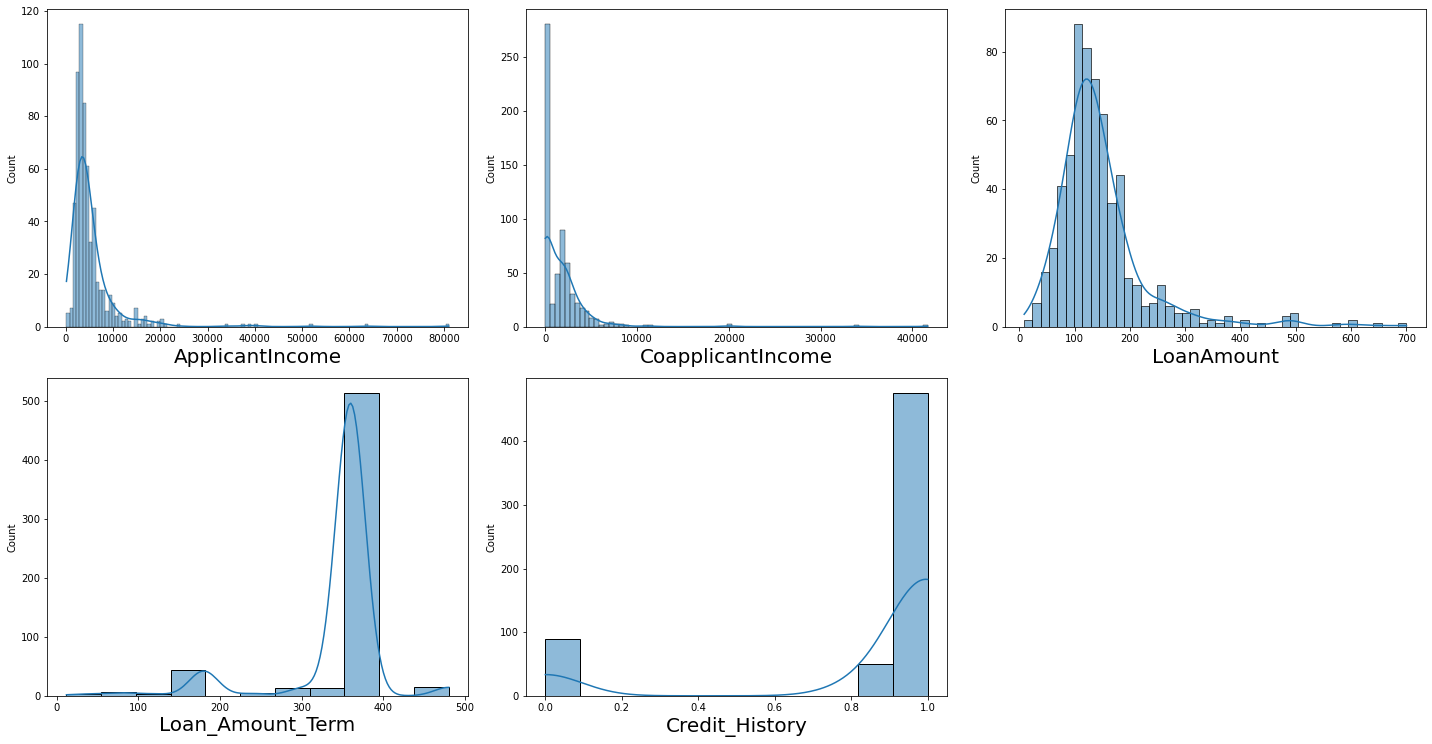

In [49]:
#Separating the continuous features and checking normal distribution with histplot:
df_features= df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History']] 
plt.figure(figsize=(20,15),facecolor='white')
plotnumber=1
for column in df_features:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.histplot(df_features[column],kde=True)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

- The colums are not normally distributed ,most of the columns are skewed.
- Applicant income ,Co applicant income and Loan Amount is highly right skewed.
- Loan Amount Term and Credit History is in abnormal shape.we will remove the skewness below.

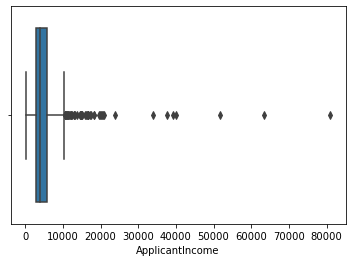

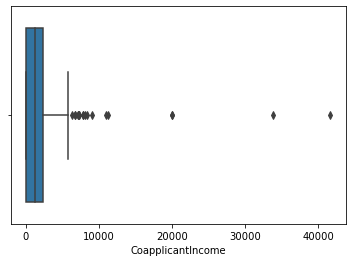

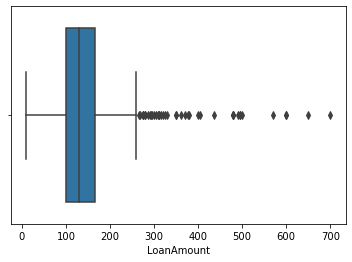

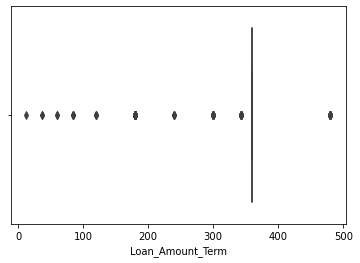

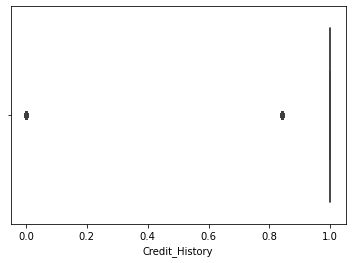

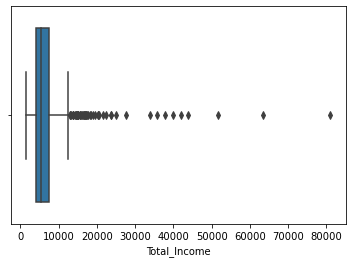

In [50]:
#Checking for outliers by using boxplot:
for i in df.columns:
    if df[i].dtypes!=object:
        sns.boxplot(df[i])
        plt.show()

- Having outliers in almost all the column.

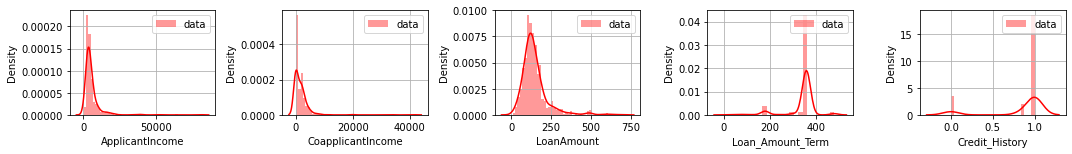

In [51]:
# Checking normal distribution:
plt.figure(figsize=(15,10))
for i,col in enumerate(list(df_features.columns.values)):
    plt.subplot(5,5,i+1)
    sns.distplot(df_features[col],color='r',kde=True,label='data')
    plt.grid()
    plt.legend(loc='upper right')
    plt.tight_layout()

- The colums are not normally distributed ,most of the columns are skewed.
- Applicant income ,Co applicant income and Loan Amount is highly right skewed.
- Loan Amount Term and Credit History is in abnormal shape.we will remove the skewness below.

In [52]:
#Label encoding the Loan status column:
l = LabelEncoder()
l_s = ['Loan_Status']
for i in l_s:
    df[i] = l.fit_transform(df[i])

In [983]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,1,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,0,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,1,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,1,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,1,6000.0


- checking after encoding the Loan Status column.It is enocoded as Y=1 and N=0.(Y=Yes and N=No).

In [984]:
df['Loan_Status'].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

- counting the loan status column,we find that 1 has 422 values and 0 has 192 values.as Y=1 and N=0.(Y=Yes and N=No) Yes values have higher values than novalues.That means loan approval rate is higher than the rejected loan approval.

In [53]:
#Checking co-relation:
df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Total_Income
ApplicantIncome,1.000000,-0.116605,0.565620,-0.045242,-0.014477,-0.004710,0.893037
CoapplicantIncome,-0.116605,1.000000,0.187828,-0.059675,-0.001665,-0.059187,0.342781
LoanAmount,0.565620,0.187828,1.000000,0.038801,-0.007738,-0.036416,0.620102
Loan_Amount_Term,-0.045242,-0.059675,0.038801,1.000000,0.001395,-0.020974,-0.069830
Credit_History,-0.014477,-0.001665,-0.007738,0.001395,1.000000,0.540483,-0.014447
Loan_Status,-0.004710,-0.059187,-0.036416,-0.020974,0.540483,1.000000,-0.031271
Total_Income,0.893037,0.342781,0.620102,-0.069830,-0.014447,-0.031271,1.000000


- Credit history has a very high corelation for loan being approved or rejected.
- Loan Status has no corelation with being Self employed.
- Loan amount is corelated with Applicant Income.

In [986]:
#Encoding the categorical columns into numerical:
LE = LabelEncoder()
df['Loan_ID'] = LE.fit_transform(df['Loan_ID'])
df['Gender'] = LE.fit_transform(df['Gender'])
df['Married'] = LE.fit_transform(df['Married'])
df['Dependents'] = LE.fit_transform(df['Dependents'])
df['Education'] = LE.fit_transform(df['Education'])
df['Self_Employed'] = LE.fit_transform(df['Self_Employed'])
df['Property_Area'] = LE.fit_transform(df['Property_Area'])


In [987]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1,5849.0
1,1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0,6091.0
2,2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1,3000.0
3,3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1,4941.0
4,4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1,6000.0


- Encoded all the categorical columns

# Skewness Removal:

In [989]:
#Removing outliers by using Z-score: 
z_score = zscore(df[[
'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History']])
abs_z_score=np.abs(z_score)

filtering_entry=(abs_z_score<2).all(axis=1)

df=df[filtering_entry]
df.describe()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
count,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000
mean,296.252604,0.804688,0.638021,0.658854,0.229167,0.117188,4009.111979,1239.153958,125.568641,358.531250,0.985617,0.997396,0.817708,5248.265938
std,174.358792,0.396958,0.481200,0.950896,0.420845,0.322063,1818.062178,1251.696314,41.310645,8.390537,0.045477,0.779967,0.386588,1834.203445
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,26.000000,300.000000,0.842199,0.000000,0.000000,1442.000000
25%,146.500000,1.000000,0.000000,0.000000,0.000000,0.000000,2705.750000,0.000000,99.000000,360.000000,1.000000,0.000000,1.000000,3900.000000
50%,295.500000,1.000000,1.000000,0.000000,0.000000,0.000000,3590.500000,1293.500000,124.000000,360.000000,1.000000,1.000000,1.000000,4932.500000
75%,442.750000,1.000000,1.000000,1.000000,0.000000,0.000000,4738.750000,2146.500000,150.000000,360.000000,1.000000,2.000000,1.000000,6236.500000
max,612.000000,1.000000,1.000000,3.000000,1.000000,1.000000,10000.000000,4648.000000,246.000000,360.000000,1.000000,2.000000,1.000000,12083.000000


- We have used z-score now we need to check the skewness as well.

In [990]:
df.skew()

Loan_ID              0.050513
Gender              -1.543148
Married             -0.576656
Dependents           1.131514
Education            1.293832
Self_Employed        2.389697
ApplicantIncome      1.192974
CoapplicantIncome    0.551160
LoanAmount           0.262636
Loan_Amount_Term    -6.392183
Credit_History      -2.852230
Property_Area        0.004537
Loan_Status         -1.652257
Total_Income         0.835707
dtype: float64

- As we can see there is still skewness present in the data. Now we are going to use power transformer to remove the skewness from feature. And for that first we will take those features with skewed data into a variable. Then we will power transform it.

In [991]:
features = ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area']

In [992]:
scaler=PowerTransformer(method='yeo-johnson')

In [993]:
df[features]=scaler.fit_transform(df[features].values)

In [994]:
df[features]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,-2.165445,0.492665,-1.327626,-0.771784,-0.545250,-0.364340,1.065623,-1.162930,0.532613,0.201565,0.31668,1.238689
1,-2.137270,0.492665,0.753224,1.014490,-0.545250,-0.364340,0.461091,0.743273,0.099656,0.201565,0.31668,-1.324255
2,-2.113368,0.492665,0.753224,-0.771784,-0.545250,2.744692,-0.482408,-1.162930,-1.494126,0.201565,0.31668,1.238689
3,-2.091877,0.492665,0.753224,-0.771784,1.834022,-0.364340,-0.785997,0.916120,-0.093106,0.201565,0.31668,1.238689
4,-2.072017,0.492665,-1.327626,-0.771784,-0.545250,-0.364340,1.131583,-1.162930,0.406796,0.201565,0.31668,1.238689
...,...,...,...,...,...,...,...,...,...,...,...,...
606,1.579698,0.492665,0.753224,1.014490,-0.545250,-0.364340,-0.217013,0.939360,1.135250,0.201565,0.31668,0.074503
607,1.583995,0.492665,0.753224,1.409501,1.834022,-0.364340,0.136558,0.718278,0.775541,0.201565,0.31668,-1.324255
608,1.588289,0.492665,0.753224,-0.771784,-0.545250,-0.364340,-0.325755,0.841630,-0.388231,0.201565,0.31668,-1.324255
609,1.592581,-2.029778,-1.327626,-0.771784,-0.545250,-0.364340,-0.552468,-1.162930,-1.355051,0.201565,0.31668,-1.324255


- As we can see the data is looking good than before. Now let's check the skewness one last time before model train.

In [995]:
df.skew()

Loan_ID             -0.279246
Gender              -1.543148
Married             -0.576656
Dependents           0.562107
Education            1.293832
Self_Employed        2.389697
ApplicantIncome      0.097366
CoapplicantIncome   -0.267695
LoanAmount           0.001502
Loan_Amount_Term    -4.781132
Credit_History      -2.852230
Property_Area       -0.133797
Loan_Status         -1.652257
Total_Income         0.835707
dtype: float64

- As we can see most of the skewed data is now looking good other than Loan amount term.

In [55]:
# Dropping the unwanted columns:
df.drop(['Property_Area','ApplicantIncome','CoapplicantIncome'], axis=1, inplace=True)
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,146.412162,360.0,1.0,1,5849.0
1,LP001003,Male,Yes,1,Graduate,No,128.000000,360.0,1.0,0,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,66.000000,360.0,1.0,1,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,120.000000,360.0,1.0,1,4941.0
4,LP001008,Male,No,0,Graduate,No,141.000000,360.0,1.0,1,6000.0
...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,71.000000,360.0,1.0,1,2900.0
610,LP002979,Male,Yes,3+,Graduate,No,40.000000,180.0,1.0,1,4106.0
611,LP002983,Male,Yes,1,Graduate,No,253.000000,360.0,1.0,1,8312.0
612,LP002984,Male,Yes,2,Graduate,No,187.000000,360.0,1.0,1,7583.0


In [56]:
#dividing the dataset into feature and target.
x = df.drop(columns=['Loan_Status'], axis=1)
y = df['Loan_Status']
x

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Total_Income
0,LP001002,Male,No,0,Graduate,No,146.412162,360.0,1.0,5849.0
1,LP001003,Male,Yes,1,Graduate,No,128.000000,360.0,1.0,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,66.000000,360.0,1.0,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,120.000000,360.0,1.0,4941.0
4,LP001008,Male,No,0,Graduate,No,141.000000,360.0,1.0,6000.0
...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,71.000000,360.0,1.0,2900.0
610,LP002979,Male,Yes,3+,Graduate,No,40.000000,180.0,1.0,4106.0
611,LP002983,Male,Yes,1,Graduate,No,253.000000,360.0,1.0,8312.0
612,LP002984,Male,Yes,2,Graduate,No,187.000000,360.0,1.0,7583.0


In [57]:
# After separation the target with features we are going to balance the target before model creation.

In [999]:
# Balancing both the classes with SMOTE:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x,y = sm.fit_resample(x,y)

In [1000]:
df['Loan_Status'].value_counts()

1    314
0     70
Name: Loan_Status, dtype: int64

# Standardization:

In [1001]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# VIF:

In [1002]:
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(x_scaled,i)for i in range(x_scaled.shape[1])]
vif["Features"] = x.columns
vif

,vif,Features
0,1.014200,Loan_ID
1,1.203989,Gender
2,1.374295,Married
3,1.193960,Dependents
4,1.073991,Education
5,1.059108,Self_Employed
6,1.966772,LoanAmount
7,1.027951,Loan_Amount_Term
8,1.021035,Credit_History
9,2.021220,Total_Income


# HOLD OUT METHOD:

In [1003]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.25, random_state=41)

# BUILDING MODEL:

# 1.LOGISTIC REGRESSION:

In [1004]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
lr_pred = lr.predict(x_train)
lr_clf_report = pd.DataFrame(classification_report(y_train,lr_pred,output_dict=True))
print(f"Accuracy score:{accuracy_score(y_train,lr_pred)*100:.2f}%")
print(f"CLASSIFICATION REPORT:\n{lr_clf_report}")
print(f" Confusion Matrix:\n{confusion_matrix(y_train,lr_pred)}\n")

Accuracy score:59.66%
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.595041    0.598253  0.596603    0.596647      0.596644
recall       0.610169    0.582979  0.596603    0.596574      0.596603
f1-score     0.602510    0.590517  0.596603    0.596514      0.596527
support    236.000000  235.000000  0.596603  471.000000    471.000000
 Confusion Matrix:
[[144  92]
 [ 98 137]]



In [1005]:
lr_pred=lr.predict(x_test)
lr_clf_report = pd.DataFrame(classification_report(y_test,lr_pred,output_dict=True))
print(f"Accuracy score:{accuracy_score(y_test,lr_pred)*100:.2f}%")
print(f"CLASSIFICATION REPORT:\n{lr_clf_report}")
print(f" Confusion Matrix:\n{confusion_matrix(y_test,lr_pred)}\n")

Accuracy score:57.96%
CLASSIFICATION REPORT:
                   0          1  accuracy   macro avg  weighted avg
precision   0.573171   0.586667  0.579618    0.579919      0.579962
recall      0.602564   0.556962  0.579618    0.579763      0.579618
f1-score    0.587500   0.571429  0.579618    0.579464      0.579413
support    78.000000  79.000000  0.579618  157.000000    157.000000
 Confusion Matrix:
[[47 31]
 [35 44]]



In [1006]:
roc_auc_score(y_test,lr.predict(x_test))

0.5797630639402791

# 2.DecisionTree Classifier:

In [1007]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt_pred = dt.predict(x_train)
dt_clf_report = pd.DataFrame(classification_report(y_train,dt_pred,output_dict=True))
print(f"Accuracy score:{accuracy_score(y_train,dt_pred)*100:.2f}%")
print(f"CLASSIFICATION REPORT:\n{dt_clf_report}")
print(f" Confusion Matrix:\n{confusion_matrix(y_train,dt_pred)}\n")

Accuracy score:100.00%
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    236.0  235.0       1.0      471.0         471.0
 Confusion Matrix:
[[236   0]
 [  0 235]]



In [1008]:
dt_pred=dt.predict(x_test)
dt_clf_report = pd.DataFrame(classification_report(y_test,dt_pred,output_dict=True))
print(f"Accuracy score:{accuracy_score(y_test,dt_pred)*100:.2f}%")

print(f"CLASSIFICATION REPORT:\n{dt_clf_report}")

print(f" Confusion Matrix:\n{confusion_matrix(y_test,dt_pred)}\n")

Accuracy score:82.80%
CLASSIFICATION REPORT:
                   0          1  accuracy   macro avg  weighted avg
precision   0.807229   0.851351  0.828025    0.829290      0.829431
recall      0.858974   0.797468  0.828025    0.828221      0.828025
f1-score    0.832298   0.823529  0.828025    0.827914      0.827886
support    78.000000  79.000000  0.828025  157.000000    157.000000
 Confusion Matrix:
[[67 11]
 [16 63]]



In [1009]:
roc_auc_score(y_test,dt.predict(x_test))

0.8282213567023694

# 3. Random Forest Classifier:

In [1010]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
rf_pred = rf.predict(x_train)
rf_clf_report = pd.DataFrame(classification_report(y_train,rf_pred,output_dict=True))
print(f"Accuracy score:{accuracy_score(y_train,rf_pred)*100:.2f}%")
print(f"CLASSIFICATION REPORT:\n{rf_clf_report}")
print(f" Confusion Matrix:\n{confusion_matrix(y_train,rf_pred)}\n")

Accuracy score:100.00%
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    236.0  235.0       1.0      471.0         471.0
 Confusion Matrix:
[[236   0]
 [  0 235]]



In [1011]:
rf_pred=rf.predict(x_test)
rf_clf_report = pd.DataFrame(classification_report(y_test,rf_pred,output_dict=True))
print(f"Accuracy score:{accuracy_score(y_test,rf_pred)*100:.2f}%")
print(f"CLASSIFICATION REPORT:\n{rf_clf_report}")
print(f" Confusion Matrix:\n{confusion_matrix(y_test,rf_pred)}\n")


Accuracy score:88.54%
CLASSIFICATION REPORT:
                   0          1  accuracy   macro avg  weighted avg
precision   0.916667   0.858824   0.88535    0.887745      0.887561
recall      0.846154   0.924051   0.88535    0.885102      0.885350
f1-score    0.880000   0.890244   0.88535    0.885122      0.885155
support    78.000000  79.000000   0.88535  157.000000    157.000000
 Confusion Matrix:
[[66 12]
 [ 6 73]]



In [1012]:
roc_auc_score(y_test,rf.predict(x_test))

0.8851022395326194

# 4.K-NeighborsClassifier:

In [1013]:
kn = KNeighborsClassifier()
kn.fit(x_train,y_train)
kn_pred = kn.predict(x_train)
kn_clf_report = pd.DataFrame(classification_report(y_train,kn_pred,output_dict=True))
print(f"Accuracy score:{accuracy_score(y_train,kn_pred)*100:.2f}%")
print(f"CLASSIFICATION REPORT:\n{kn_clf_report}")
print(f" Confusion Matrix:\n{confusion_matrix(y_train,kn_pred)}\n")

Accuracy score:83.65%
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.814229    0.862385  0.836518    0.838307      0.838256
recall       0.872881    0.800000  0.836518    0.836441      0.836518
f1-score     0.842536    0.830022  0.836518    0.836279      0.836292
support    236.000000  235.000000  0.836518  471.000000    471.000000
 Confusion Matrix:
[[206  30]
 [ 47 188]]



In [1014]:
kn_pred=kn.predict(x_test)
kn_clf_report = pd.DataFrame(classification_report(y_test,kn_pred,output_dict=True))
print(f"Accuracy score:{accuracy_score(y_test,kn_pred)*100:.2f}%")
print(f"CLASSIFICATION REPORT:\n{kn_clf_report}")
print(f" Confusion Matrix:\n{confusion_matrix(y_test,kn_pred)}\n")

Accuracy score:77.71%
CLASSIFICATION REPORT:
                   0          1  accuracy   macro avg  weighted avg
precision   0.747126   0.814286   0.77707    0.780706      0.780920
recall      0.833333   0.721519   0.77707    0.777426      0.777070
f1-score    0.787879   0.765101   0.77707    0.776490      0.776417
support    78.000000  79.000000   0.77707  157.000000    157.000000
 Confusion Matrix:
[[65 13]
 [22 57]]



In [1015]:
roc_auc_score(y_test,kn.predict(x_test))

0.7774261603375527

# 5.Support vector classifier:

In [1016]:
svc = SVC()
svc.fit(x_train,y_train)
svc_pred = svc.predict(x_train)
svc_clf_report = pd.DataFrame(classification_report(y_train,svc_pred,output_dict=True))
print(f"Accuracy score:{accuracy_score(y_train,svc_pred)*100:.2f}%")
print(f"CLASSIFICATION REPORT:\n{lr_clf_report}")
print(f" Confusion Matrix:\n{confusion_matrix(y_train,svc_pred)}\n")

Accuracy score:83.86%
CLASSIFICATION REPORT:
                   0          1  accuracy   macro avg  weighted avg
precision   0.573171   0.586667  0.579618    0.579919      0.579962
recall      0.602564   0.556962  0.579618    0.579763      0.579618
f1-score    0.587500   0.571429  0.579618    0.579464      0.579413
support    78.000000  79.000000  0.579618  157.000000    157.000000
 Confusion Matrix:
[[178  58]
 [ 18 217]]



In [1017]:
svc_pred=svc.predict(x_test)
svc_report = pd.DataFrame(classification_report(y_test,svc_pred,output_dict=True))
print(f"Accuracy score:{accuracy_score(y_test,svc_pred)*100:.2f}%")
print(f"CLASSIFICATION REPORT:\n{svc_report}")
print(f" Confusion Matrix:\n{confusion_matrix(y_test,svc_pred)}\n")

Accuracy score:75.16%
CLASSIFICATION REPORT:
                   0          1  accuracy   macro avg  weighted avg
precision   0.819672   0.708333  0.751592    0.764003      0.763648
recall      0.641026   0.860759  0.751592    0.750893      0.751592
f1-score    0.719424   0.777143  0.751592    0.748284      0.748467
support    78.000000  79.000000  0.751592  157.000000    157.000000
 Confusion Matrix:
[[50 28]
 [11 68]]



In [1018]:
roc_auc_score(y_test,svc.predict(x_test))

0.7508925673482636

# 6.Gradient Boost Classifier:

In [1019]:
gbc = GradientBoostingClassifier()
gbc.fit(x_train,y_train)
gbc_pred = gbc.predict(x_train)
gbc_clf_report = pd.DataFrame(classification_report(y_train,gbc_pred,output_dict=True))
print(f"Accuracy score:{accuracy_score(y_train,gbc_pred)*100:.2f}%")
print(f"CLASSIFICATION REPORT:\n{gbc_clf_report}")
print(f" Confusion Matrix:\n{confusion_matrix(y_train,gbc_pred)}\n")

Accuracy score:95.33%
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    1.000000    0.914397  0.953291    0.957198      0.957289
recall       0.906780    1.000000  0.953291    0.953390      0.953291
f1-score     0.951111    0.955285  0.953291    0.953198      0.953193
support    236.000000  235.000000  0.953291  471.000000    471.000000
 Confusion Matrix:
[[214  22]
 [  0 235]]



In [1020]:
gbc_pred=gbc.predict(x_test)
gbc_report = pd.DataFrame(classification_report(y_test,svc_pred,output_dict=True))
print(f"Accuracy score:{accuracy_score(y_test,gbc_pred)*100:.2f}%")
print(f"CLASSIFICATION REPORT:\n{gbc_report}")
print(f" Confusion Matrix:\n{confusion_matrix(y_test,gbc_pred)}\n")

Accuracy score:86.62%
CLASSIFICATION REPORT:
                   0          1  accuracy   macro avg  weighted avg
precision   0.819672   0.708333  0.751592    0.764003      0.763648
recall      0.641026   0.860759  0.751592    0.750893      0.751592
f1-score    0.719424   0.777143  0.751592    0.748284      0.748467
support    78.000000  79.000000  0.751592  157.000000    157.000000
 Confusion Matrix:
[[63 15]
 [ 6 73]]



In [1021]:
roc_auc_score(y_test,gbc.predict(x_test))

0.8658714703018501

# CROSS VALIDATION SCORE:

In [1022]:
print(f" CV Score of LR:{cross_val_score(lr,x,y,cv=5).mean()*100:.2f}%")

 CV Score of LR:50.33%


In [1023]:
print(f"CV Score of DT:{cross_val_score(dt,x,y,cv=5).mean()*100:.2f}%")

CV Score of DT:49.83%


In [1024]:
print(f"CV Score of RF:{cross_val_score(rf,x,y,cv=5).mean()*100:.2f}%")

CV Score of RF:58.14%


In [1026]:
print(f"CV Score of SVC:{cross_val_score(svc,x,y,cv=5).mean()*100:.2f}%")

CV Score of SVC:57.81%


In [1027]:
print(f"CV Score of SVC:{cross_val_score(gbc,x,y,cv=5).mean()*100:.2f}%")

CV Score of SVC:46.98%


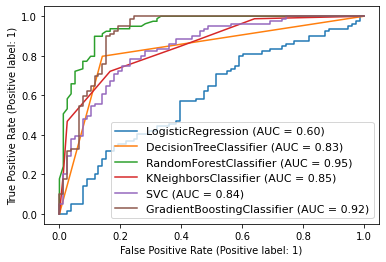

In [1028]:
# Let's check ROC_AUC curve for fitted models:

disp =plot_roc_curve(lr,x_test,y_test)
plot_roc_curve(dt,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rf,x_test,y_test,ax=disp.ax_)
plot_roc_curve(kn,x_test,y_test,ax=disp.ax_)
plot_roc_curve(svc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(gbc,x_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':11},loc='lower right')
plt.show()

- Choosing Random forrest model as the best model because we got accuracy score of 88.54% ,cross validation score of 58.14 which is highest from rest of the models. and auc score of 95%.

# HYPER PARAMETER TUNING OF RANDOM FORREST MODEL:

In [1029]:
grid_param={
   'n_estimators':[13,15,15,17,19,21],
       'criterion':['entropy','gini'],
       'max_depth':[10,15,20,25,30,35],
       'min_samples_split':[10,11,12,13,14,15],
       'min_samples_leaf':[5,6,7,8,9,10]}

In [1030]:
grid_search=GridSearchCV(estimator=rf,param_grid=grid_param,cv=5,n_jobs=-1)

In [1031]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [10, 15, 20, 25, 30, 35],
                         'min_samples_leaf': [5, 6, 7, 8, 9, 10],
                         'min_samples_split': [10, 11, 12, 13, 14, 15],
                         'n_estimators': [13, 15, 15, 17, 19, 21]})

In [1032]:
best_parameters=grid_search.best_params_
print(best_parameters)

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 14, 'n_estimators': 21}


In [1033]:
rf = RandomForestClassifier(criterion= 'entropy',max_depth=10,min_samples_leaf = 5, min_samples_split=14,n_estimators =21)
rf.fit(x_train,y_train)
rf.score(x_test,y_test)

0.8598726114649682

- after hyper parameter tuning we got apprix 86% score.

In [1034]:
# model prediction using DT
x_predict = list(rf.predict(x_test))
rf_loan = {'predicted_values':x_predict,'orignal_values':y_test}
print(pd.DataFrame(rf_loan))

     predicted_values  orignal_values
563                 0               0
342                 1               1
42                  1               1
324                 1               1
279                 1               1
..                ...             ...
20                  1               0
381                 1               1
518                 0               0
218                 1               1
18                  0               1

[157 rows x 2 columns]


In [1035]:
#import joblib
import joblib

joblib.dump(dt,'rf_loan_file.obj')

# SAVING THE MODEL

['rf_loan_file.obj']

In [1036]:
rf_loan_joblib=joblib.load('rf_loan_file.obj')
rf_loan_joblib.predict(x_test)

#TESTING THE SAVED MODEL

array([0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1])

# Conclusion:

- We did Exploratory data Analysis on the features of this dataset and saw how each feature is distributed.
- We did bivariate and multivariate analysis to see imapct of one another on their features using charts.
- We analysed each variable to check if data is cleaned and normally distributed.
- We cleaned the data and removed NA values.
- We also generated hypothesis to prove an association among the Independent variables and the Target variable. And based on the results, we assumed whether or not there is an association.
- We calculated correaltion between independent variables and found that applicant income and loan amount have significant relation.
- We constructed models taking different variables into account and found through odds ratio that credit credit history is creating the most impact on loan giving decision.
- Finally, we got a model with coapplicant income and credit history as independent variable with highest accuracy.
- We tested the data and got the accuracy of 86 %.
